# Exercise 1

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Variables
n = 100
eps = 1e-8

### Question 1

In [3]:
p1 = np.linspace(0,1,n)
p2 = np.linspace(0,1,n)

def entropy(p1,p2):
    if p1+p2>1:#exclude the part of the graph outside the part of interest
        return 0
    else:
        p3 = 1-p1-p2
        if p1 < eps:#0log0 = 0
            h1 = 0
        else:
            h1 = p1*np.log2(p1)
        if p2 < eps:
            h2 = 0
        else:
            h2 = p2*np.log2(p2)
        if p3 <eps:
            h3 = 0
        else:
            h3 = p3*np.log2(p3)
        
        return -(h1+h2+h3)

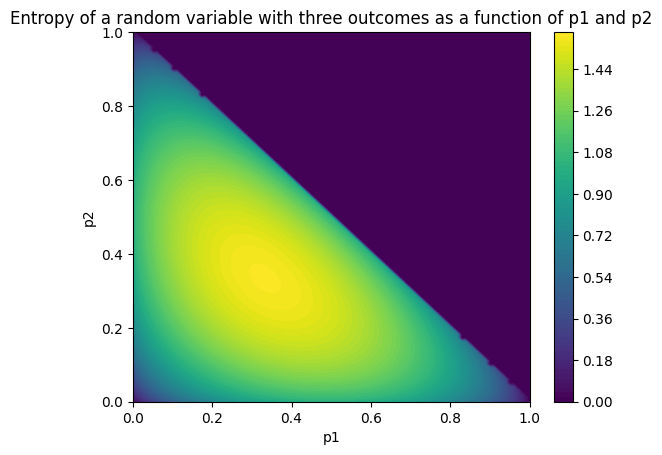

In [4]:
H = np.array([[entropy(a,b) for a in p1] for b in p2])#Compute entropy for each triplet of probability values
x,y = np.meshgrid(p1,p2)
color = plt.contourf(x,y,H,levels = 100)#Plot the entropy as a color map
plt.colorbar(color)
plt.title('Entropy of a random variable with three outcomes as a function of p1 and p2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

### Question 2

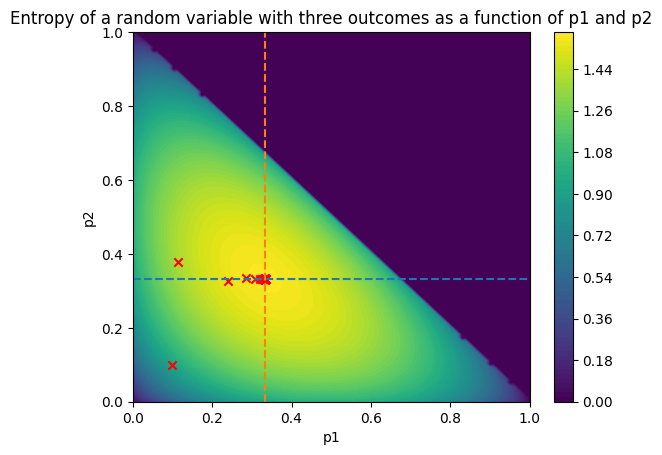

In [5]:
init = [[0.1,0.1,0.8]] #Starting vector with unbalanced probabilities
h=[entropy(init[0][0],init[0][1])]
for i in range(n):
    a,b,c = init[i]
    init.append([(a+b)/2,(a+b+c)/3,(b+c)/2])#Update the probabilities
    init[i+1] = init[i+1]/np.sum(init[i+1])#Normalize them
    h.append(entropy(init[i+1][0],init[i+1][1]))

init = np.array(init)

color = plt.contourf(x,y,H,levels = 100)
plt.colorbar(color)
plt.title('Entropy of a random variable with three outcomes as a function of p1 and p2')
plt.xlabel('p1')
plt.ylabel('p2')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(1/3*np.ones(n),linestyle='dashed')
plt.plot(1/3*np.ones(n),np.linspace(0,1,n),linestyle='dashed')
plt.scatter(init[:,0],init[:,1],marker='x',color='r')
plt.show()

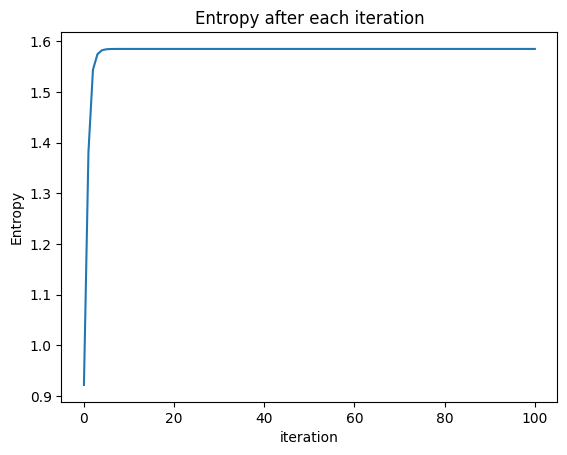

Maximum value of the entropy: 1.584962500721156
Maximum value of the entropy reached: 1.5849625007211565


In [6]:
plt.plot(h)
plt.title('Entropy after each iteration')
plt.xlabel('iteration')
plt.ylabel('Entropy')
plt.show()
print ('Maximum value of the entropy:',np.max(H))
print('Maximum value of the entropy reached:',np.max(h))